# EDA

In [1]:
import os
from glob import glob
from pathlib import Path
from itertools import chain

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io



In [51]:
# helper function to get the direct path to the directory
# so we can import files from other directories
cwd = Path(os.getcwd())
directory_root = os.path.abspath(cwd.parent)

In [52]:
all_xray_df = pd.read_csv(directory_root + '/data/Data_Entry_2017.csv')
df = all_xray_df.copy()
df.head(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN


## Data preperation

In [53]:
all_image_paths = {os.path.basename(x): x for x in glob(os.path.join(directory_root + '/data','images*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total rows in dataset:', df.shape[0])

Scans found: 1402 , Total rows in dataset: 112120


Because we only work with a subset of the data (1402 of 112.120) it makes sense to get a reduced dataframe with only the data of the images we have. 

In [54]:
image_paths = []
for key in all_image_paths:
    image_paths.append(key) 
df = df[df['Image Index'].isin(image_paths)]

In [55]:
# Now our df only contains data about our subset of 1402 images  
print(len(df))

1402


Looking at the columns of our dataset we can remove some of the columns we do not need.

In [56]:
df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [57]:
# first remove the spaces in the column names
df.columns = df.columns.str.replace(' ', '_')
all_xray_df.columns = all_xray_df.columns.str.replace(' ', '_')

df.columns

Index(['Image_Index', 'Finding_Labels', 'Follow-up_#', 'Patient_ID',
       'Patient_Age', 'Patient_Gender', 'View_Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed:_11'],
      dtype='object')

In [58]:
del df['View_Position']
del df['OriginalImage[Width']
del df['Height]']
del df['OriginalImagePixelSpacing[x']
del df['y]']
del df['Unnamed:_11']

del all_xray_df['View_Position']
del all_xray_df['OriginalImage[Width']
del all_xray_df['Height]']
del all_xray_df['OriginalImagePixelSpacing[x']
del all_xray_df['y]']
del all_xray_df['Unnamed:_11']

df.columns

Index(['Image_Index', 'Finding_Labels', 'Follow-up_#', 'Patient_ID',
       'Patient_Age', 'Patient_Gender'],
      dtype='object')

### Now let us take a closer look at the Finding_Labels column

In [62]:
all_labels = np.unique(list(chain(*all_xray_df['Finding_Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print("Labels:", all_labels)
print("Labels lenght:", len(all_labels))

Labels: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
Labels lenght: 15


In [63]:
for c_label in all_labels:
    if len(c_label) > 1: # leave out empty labels
        df[c_label] = df['Finding_Labels'].map(lambda finding: 1 if c_label in finding else 0)
        all_xray_df[c_label] = all_xray_df['Finding_Labels'].map(lambda finding: 1 if c_label in finding else 0)

df.head(1)

,Image_Index,Finding_Labels,Follow-up_#,Patient_ID,Patient_Age,Patient_Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
8,00000003_004.png,Hernia,4,3,77,F,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


The result is a dataframe with additional columns for each finding and a 0 or 1 depending of the patient and if she had the disease. We can also now drop the Finding_Labels column.

In [64]:
del df['Finding_Labels']
del all_xray_df['Finding_Labels']

Now we are able to answer our question of how many cases of pneumonia we have in both datasets!

In [65]:
print("Total subset: ", df['Pneumonia'].sum())
print("%: ", df['Pneumonia'].sum()/len(df))

Total subset:  539
%:  0.38445078459343796


In [66]:
print("Total whole dataset: ", all_xray_df['Pneumonia'].sum())
print("%: ", all_xray_df['Pneumonia'].sum()/len(all_xray_df))

Total whole dataset:  1431
%:  0.012763110952550838


So we can see that in the whole dataset 0.013 % of all patients have pneumonia. In our subset there are 539 images of pneumonia which makes up 0.38 % of all images.

## Dataset analysis
Now lets look at our dataset a little more in depth

### Gender distribution

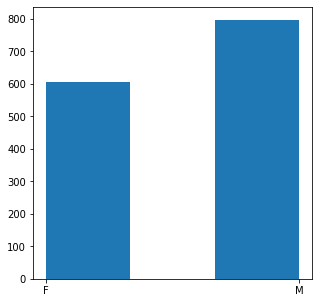

Male Patients: 797
Female Patients: 605


In [16]:
plt.figure(figsize=(5,5))
plt.hist(df.Patient_Gender, bins = 3)
plt.show()

male_patiens = len(list(filter(None, df.Patient_Gender == "M")))
female_patiens = len(list(filter(None, df.Patient_Gender == "F")))
print("Male Patients:", male_patiens)
print("Female Patients:", female_patiens)

### Age distribution

Min Age: 2
Max Age: 92
Mean Age: 46.06062767475036
Median Age: 48.0



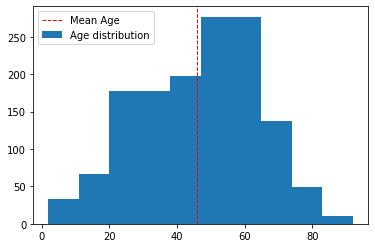

In [67]:
mean_age = np.mean(df.Patient_Age)
median_age = np.median(df.Patient_Age)
min_age = np.min(df.Patient_Age)
max_age = np.max(df.Patient_Age)

print("Min Age:", min_age)
print("Max Age:", max_age)
print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("")

fig,ax = plt.subplots()

data_line = ax.hist(df.Patient_Age, label='Age distribution')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label='Mean Age')
legend = ax.legend(loc='upper left')

plt.show()

The resulting dataset consists of patients from the age of 2 to 92. The mean age ist 46, the median age is 48.

### Case distribution

[Text(0, 0.5, 'Number of Images with Label')]

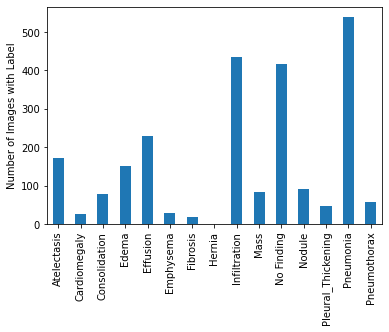

In [22]:
ax = df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

The most common value, besides Pneumonia, is "No finding". The most common disease together with Pneumonia is "Infiltration".

Now let's look with a little bit more detail on the patients which do have Pneumonia

In [68]:
d_pneumonia = df.copy()
has_pneumonia =  d_pneumonia['Pneumonia'] == 1
d_pneumonia = d_pneumonia[has_pneumonia]

d_pneumonia.shape

(539, 20)

### Gender distribution of Pneumonia patients

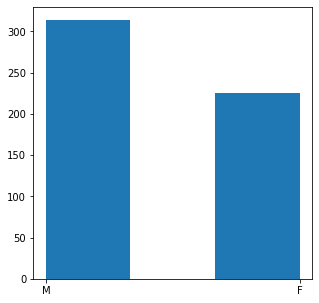

Male Patients: 314
Female Patients: 225
1.4 male to female patients


In [69]:
plt.figure(figsize=(5,5))
plt.hist(d_pneumonia.Patient_Gender, bins = 3)
plt.show()

male_patiens = len(list(filter(None, d_pneumonia.Patient_Gender == "M")))
female_patiens = len(list(filter(None, d_pneumonia.Patient_Gender == "F")))
print("Male Patients:", male_patiens)
print("Female Patients:", female_patiens)
print(round(male_patiens / female_patiens, 2), "male to female patients")

Min Age: 3
Max Age: 87
Mean Age: 44.01298701298701
Median Age: 45.0



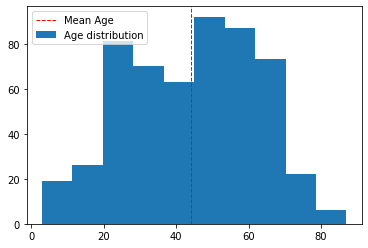

In [70]:
mean_age = np.mean(d_pneumonia.Patient_Age)
median_age = np.median(d_pneumonia.Patient_Age)
min_age = np.min(d_pneumonia.Patient_Age)
max_age = np.max(d_pneumonia.Patient_Age)

print("Min Age:", min_age)
print("Max Age:", max_age)
print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("")

fig,ax = plt.subplots()

data_line = ax.hist(d_pneumonia.Patient_Age, label='Age distribution')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label='Mean Age')
legend = ax.legend(loc='upper left')

plt.show()

Patients with Pneumonia tend to be a few years younger than the global population. People at arround 50-65 are most likely to have Pneumonia.

## Image data assessments

In [71]:
## helper function standardize the image
def standardize_image(imageData):
    # Find the mean and std dev intensity values of the image, and standerdize it
    mean_intensity = np.mean(imageData)
    std_intensity = np.std(imageData)
    new_img = imageData.copy()
    new_img = (new_img - mean_intensity)/std_intensity
    return new_img

## helper function to print the image and the intensity distribution
def image_distribution(image):
    f = plt.figure()
    f.set_figwidth(10)
    
    # standardize the image data
    image = standardize_image(image)
    
    s1 = f.add_subplot(1, 2, 1)
    s1.set_title('Image')
    plt.imshow(image, cmap='gray')
    
    s2 = f.add_subplot(1, 2, 2)
    s2.set_title('Intensity Distribution')
    plt.hist(image.ravel(), bins = 256)
    
    plt.show()

### Pneumonia Samples

Image Name 00001200_000.png


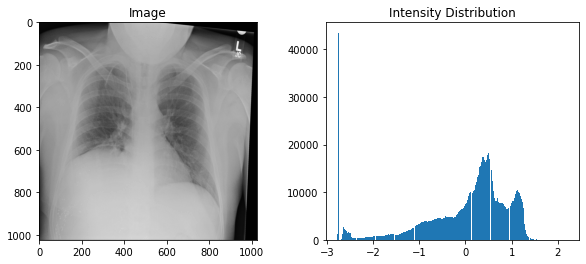

In [72]:
img = df[df['Pneumonia']==1]['Image_Index'].sample().item()
print('Image Name', img)
img = io.imread(all_image_paths[img])
image_distribution(img)

Image Name 00000218_000.png


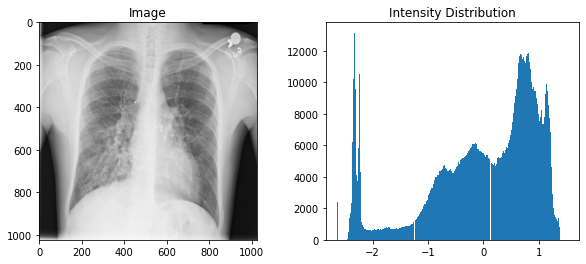

In [73]:
img = df[df['Pneumonia']==1]['Image_Index'].sample().item()
print('Image Name', img)
img = io.imread(all_image_paths[img])
image_distribution(img)

Image Name 00017710_009.png


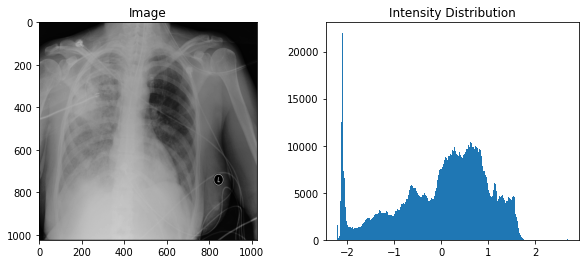

In [74]:
img = df[df['Pneumonia']==1]['Image_Index'].sample().item()
print('Image Name', img)
img = io.imread(all_image_paths[img])
image_distribution(img)

### Non Pneumonia Samples

Image Name 00000165_006.png


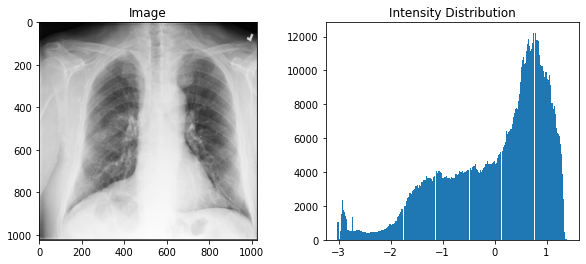

In [75]:
img = df[df['Pneumonia']==0]['Image_Index'].sample().item()
print('Image Name', img)
img = io.imread(all_image_paths[img])
image_distribution(img)

Image Name 00025727_001.png


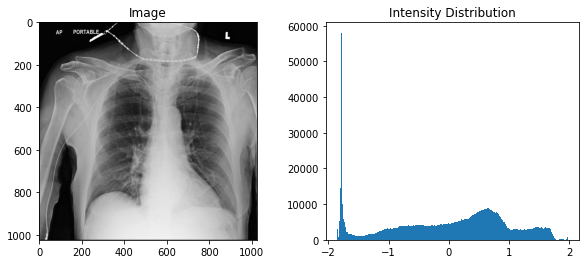

In [76]:
img = df[df['Pneumonia']==0]['Image_Index'].sample().item()
print('Image Name', img)
img = io.imread(all_image_paths[img])
image_distribution(img)

Image Name 00027987_001.png


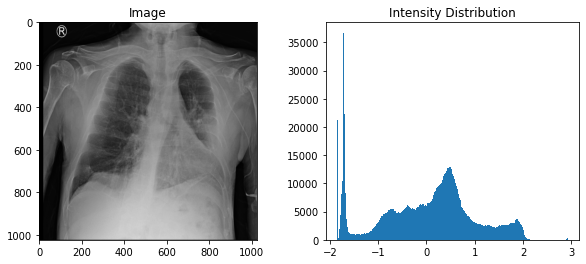

In [77]:
img = df[df['Pneumonia']==0]['Image_Index'].sample().item()
print('Image Name', img)
img = io.imread(all_image_paths[img])
image_distribution(img)

When analyzing the images of pneumonia vs. non-pneumonia patients, it appears that the pixel intensity distribution of both cases follows more a normal distribution. As already stated in the README.md of the Kaggle dataset, the diagnosis of pneumonia from chest X-rays is very difficult.